In [1]:
from src.GA.ga_initialization import *
from src.GA.load_data_ga import load_data as ld_ga, load_output as lo_ga
from src.GA.ga_structures import Individual as Id_ga, Problem as Pr_ga
from src.GA.ga_operators import *
from src.GA.ga_evolution_algorithm import run_genetic_algorithm

In [2]:
from src.GP.gp_initialization import gen_pop
from src.GP.load_data_gp import load_data as ld_gp, load_output as lo_gp
from src.GP.gp_structures import Individual as Id_gp, Problem as Pr_gp
from src.GP.gp_operators import *
from src.GP.gp_evolution_algorithm import run_gp_algorithm

In [3]:
from src.MOO.moo_initialization import *
from src.MOO.load_data_moo import load_data as ld_moo, load_output as lo_moo
from src.MOO.moo_structures import Individual as Id_moo, Problem as Pr_moo
from src.MOO.moo_operators import *
from src.MOO.moo_evolution_algorithm import run_nsga2

In [4]:
import numpy as np

In [5]:
data = ld_ga('dataset/hustack/input/200.txt')
problem_ga = Pr_ga(num_request=data[0],
                  request=data[1], 
                  time_matrix=np.array(data[2]))

In [6]:
data_gp = ld_gp('dataset/hustack/input/200.txt')
problem_gp = Pr_gp(num_request=data[0],
                  request=data[1], 
                  time_matrix=np.array(data[2]))

In [7]:
data_moo = ld_moo('dataset/hustack/input/200.txt')
problem = Problem(num_request=data[0],
                  request=data[1], 
                  time_matrix=np.array(data[2]))

In [8]:
best_solution = lo_ga('dataset/hustack/input/200.txt', 'dataset/hustack/output/200-bestSolution.txt')

In [9]:
best_solution.calObjective()

np.float64(103560.0)

In [10]:
cal_std_fitness([best_solution])

In [11]:
print("---> Fittest individual: ", best_solution.fitness)
print("-----Corresponding to the best individual-----")
print("---> Route:",  best_solution.route)

# Index 3: Total time (Scalar)
print("---> Total service time: ", best_solution.route_computing[3]) 

# Index 3: Total time (Scalar)
print("---> Total travel time: ", sum(best_solution.route_computing[0])) 

# Index 4: Lateness (List) -> dùng để đếm số lần vi phạm
print("Number of time window violations: ", sum(1 for x in best_solution.route_computing[4] if x != 0.0))

# Index 5: Total Lateness (Scalar)
print("Total time of late arrivals: ", best_solution.route_computing[5])

# Index 6: Wait (List) -> dùng để đếm số lần đến sớm
print("Number of arrivals ealier than opening time: ", sum(1 for x in best_solution.route_computing[6] if x != 0))

# Index 7: Total Wait (Scalar)
print("Total time of arrivals ealier than opening time:", best_solution.route_computing[7])

---> Fittest individual:  103560.0
-----Corresponding to the best individual-----
---> Route: [54, 92, 148, 4, 64, 149, 133, 126, 89, 86, 49, 142, 76, 105, 41, 162, 178, 39, 198, 98, 169, 195, 110, 100, 165, 193, 172, 163, 29, 6, 19, 189, 137, 34, 179, 67, 40, 157, 11, 158, 1, 108, 43, 174, 136, 93, 143, 48, 44, 182, 150, 197, 53, 97, 71, 102, 88, 138, 109, 16, 46, 183, 63, 69, 5, 130, 60, 3, 68, 166, 2, 171, 73, 116, 200, 127, 77, 177, 38, 140, 81, 160, 134, 84, 156, 164, 87, 57, 199, 90, 91, 117, 28, 94, 95, 112, 78, 188, 192, 21, 155, 120, 75, 14, 35, 83, 107, 196, 10, 52, 111, 118, 42, 151, 186, 167, 32, 51, 119, 170, 181, 122, 66, 194, 125, 132, 13, 9, 173, 8, 131, 61, 7, 185, 146, 70, 33, 103, 139, 82, 141, 129, 47, 22, 176, 135, 147, 36, 101, 45, 123, 25, 24, 154, 121, 15, 99, 153, 37, 144, 161, 96, 80, 59, 114, 56, 159, 17, 12, 106, 55, 65, 115, 152, 175, 20, 124, 168, 26, 31, 62, 50, 74, 184, 27, 113, 30, 79, 187, 190, 191, 128, 58, 85, 104, 180, 145, 72, 23, 18]
---> Total se

In [12]:
pop_size = 50
c_rate = 0.8
m_rate = 0.2
generations = 200
maximum_loop = 50

In [13]:
params ={
    "smethod": 'roulette', # tournament, roulette, random, ranking
    "cmethod": 'ox', # ox, pmx, cx
    "mmethod": 'swap', # inversion, swap, scramble
    "svmethod": 'sus', # tournament, truncation, sus, linear
    "tourn_s_parameter": 4, # dùng cho tournament trong select_parents
    "ranking_s_parameter": 3, # dùng cho ranking trong select_parents
    "trunc_sv_parameter": 0.5, # dùng cho truncation trong apply_sv_selection
    "tourn_sv_parameter": 4, # dùng cho tournament trong apply_sv_selection
    "gen_type": 'greedy', # loại khởi tạo greedy
    "greedy_rate": 0.5, # tỉ lệ các cá thể được khởi tạo greedy trong quần thể ban đầu
    "search_size": 2, # số lượng hàng xóm xét tại mỗi điểm đang đứng mà sẽ lựa chọn một trong số chúng để đến trong lộ trình tham lam
}

In [14]:
# last_pop1 = run_genetic_algorithm(problem, pop_size, c_rate, m_rate, generations, maximum_loop, **params)
# last_pop2 = run_gp_algorithm(problem, pop_size, c_rate, m_rate, generations, maximum_loop)
# last_pop3 = run_nsga2(problem, pop_size, c_rate, m_rate, generations, maximum_loop, **params)


Running GA...
Initial fitness:  13389564.0
Gen 0: Fit=13389564 | Mut=inversion | Sel=roulette | Surv=sus
Gen 20: Fit=13222862 | Mut=inversion | Sel=roulette | Surv=sus
Gen 40: Fit=11484996 | Mut=inversion | Sel=roulette | Surv=sus
Gen 60: Fit=11402006 | Mut=inversion | Sel=tournament | Surv=sus
Gen 80: Fit=11402006 | Mut=scramble | Sel=tournament | Surv=tournament
Gen 100: Fit=10959364 | Mut=scramble | Sel=tournament | Surv=tournament
Gen 120: Fit=10954754 | Mut=scramble | Sel=tournament | Surv=tournament
Gen 140: Fit=10824384 | Mut=scramble | Sel=tournament | Surv=tournament
Gen 160: Fit=10360032 | Mut=swap | Sel=tournament | Surv=tournament
Gen 180: Fit=10360032 | Mut=swap | Sel=tournament | Surv=tournament
---> Fittest individual:  10276634.0
-----Corresponding to the best individual-----
---> Route: [4, 148, 64, 149, 126, 86, 49, 142, 76, 105, 162, 39, 98, 169, 110, 165, 193, 172, 163, 92, 29, 19, 137, 179, 40, 157, 158, 1, 108, 43, 174, 136, 143, 44, 182, 150, 133, 53, 71, 102, 13

d:\Project_all\tsp_ttth\src\GP\gp_structures.py:84: RuntimeWarning: overflow encountered in scalar multiply
  if self.op == 'mul': return val_l * val_r


Gen 20: Best Fitness = 98888.0
Gen 30: Best Fitness = 98888.0
Gen 40: Best Fitness = 98888.0
Stopping due to stagnation at gen 49.
Best GP Route: [54, 92, 148, 4, 64, 149, 133, 126, 89, 86, 49, 142, 76, 105, 41, 162, 178, 39, 198, 98, 169, 195, 110, 100, 165, 193, 172, 163, 29, 6, 19, 189, 137, 34, 179, 67, 40, 157, 11, 158, 1, 108, 43, 174, 136, 93, 143, 48, 44, 182, 150, 197, 53, 97, 71, 102, 88, 138, 109, 16, 46, 183, 63, 69, 5, 130, 60, 3, 68, 166, 2, 171, 73, 116, 200, 127, 77, 177, 38, 140, 81, 160, 134, 84, 156, 164, 87, 57, 199, 90, 91, 117, 28, 94, 95, 112, 78, 188, 192, 21, 155, 120, 75, 14, 35, 83, 107, 196, 10, 52, 111, 118, 42, 151, 186, 167, 32, 51, 119, 170, 181, 122, 66, 194, 125, 132, 13, 9, 173, 8, 131, 61, 7, 185, 146, 70, 33, 103, 139, 82, 141, 129, 47, 22, 176, 135, 147, 36, 101, 45, 123, 25, 24, 154, 121, 15, 99, 153, 37, 144, 161, 96, 80, 59, 114, 56, 159, 17, 12, 106, 55, 65, 115, 152, 175, 20, 124, 168, 26, 31, 62, 50, 74, 184, 27, 113, 30, 79, 187, 190, 191, 1

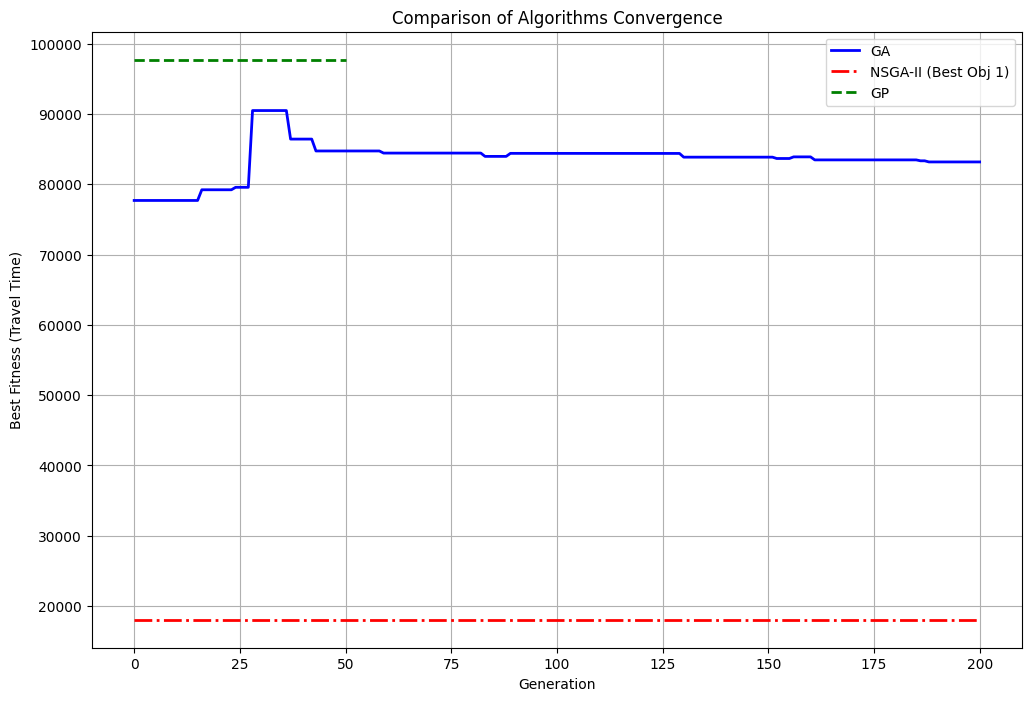

In [15]:
import matplotlib.pyplot as plt


print("Running GA...")
pop_ga, progress_ga = run_genetic_algorithm(problem, pop_size, c_rate, m_rate, generations, maximum_loop, **params)

print("Running NSGA-II...")
pop_nsga, progress_nsga = run_nsga2(problem, pop_size, c_rate, m_rate, generations, maximum_loop, **params)

print("Running GP...")
pop_gp, progress_gp = run_gp_algorithm(problem, pop_size, c_rate, m_rate, generations, maximum_loop)


plt.figure(figsize=(12, 8))
# Vẽ GA
plt.plot(progress_ga, label='GA', color='blue', linewidth=2)
# Vẽ NSGA-II (Objective 1)
plt.plot(progress_nsga, label='NSGA-II (Best Obj 1)', color='red', linewidth=2, linestyle='-.')
# Vẽ GP
plt.plot(progress_gp, label='GP', color='green', linewidth=2, linestyle='--')

plt.title('Comparison of Algorithms Convergence')
plt.xlabel('Generation')
plt.ylabel('Best Fitness (Travel Time)')
plt.legend()
plt.grid(True)
plt.show()

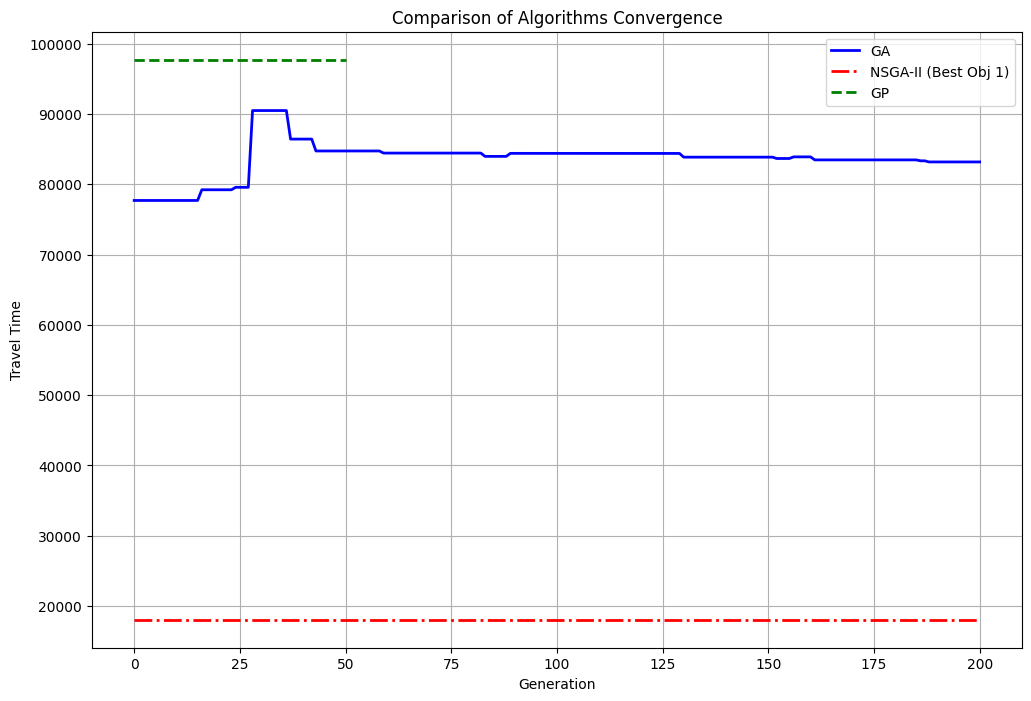

In [16]:
plt.figure(figsize=(12, 8))
# Vẽ GA
plt.plot(progress_ga, label='GA', color='blue', linewidth=2)
# Vẽ NSGA-II (Objective 1)
plt.plot(progress_nsga, label='NSGA-II (Best Obj 1)', color='red', linewidth=2, linestyle='-.')
# Vẽ GP
plt.plot(progress_gp, label='GP', color='green', linewidth=2, linestyle='--')

plt.title('Comparison of Algorithms Convergence')
plt.xlabel('Generation')
plt.ylabel('Travel Time')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import math
import random

# 1. Data Loading (Parsed from your file)
data_str = """
1 15 882
2 931 536
3 410 997
4 756 122
5 271 863
6 648 710
7 98 55
8 852 940
9 532 604
10 369 118
11 615 268
12 462 847
13 742 391
14 307 542
15 196 739
16 883 82
17 521 953
18 637 23
19 341 657
20 57 431
21 990 214
22 433 351
23 784 768
24 122 964
25 556 179
26 91 678
27 864 453
28 279 311
29 610 918
30 348 75
31 734 629
32 28 525
33 970 801
34 439 923
35 186 145
36 675 332
37 523 487
38 812 52
39 139 292
40 958 598
41 484 69
42 361 910
43 705 201
44 225 611
45 798 559
46 65 205
47 904 734
48 501 774
49 331 462
50 589 29
51 256 978
52 744 930
53 410 233
54 110 350
55 849 306
56 578 528
57 297 183
58 951 879
59 670 475
60 153 842
61 891 159
62 417 578
63 699 850
64 364 409
65 84 768
66 936 406
67 545 329
68 227 38
69 783 650
70 509 869
71 342 34
72 927 973
73 603 402
74 172 501
75 836 207
76 456 694
77 298 760
78 642 963
79 101 104
80 913 635
81 564 742
82 388 287
83 218 927
84 719 98
85 479 428
86 262 596
87 861 820
88 546 24
89 199 255
90 947 494
91 622 555
92 332 841
93 52 618
94 774 338
95 441 153
96 140 407
97 875 269
98 516 516
99 283 448
100 606 119
"""

def parse_data(data):
    lines = data.strip().split('\n')
    nodes = []
    for line in lines:
        parts = line.split()
        if len(parts) >= 3:
            nodes.append((float(parts[1]), float(parts[2])))
    return nodes

def dist(p1, p2):
    return math.sqrt((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)

def path_length(path, nodes):
    total = 0
    for i in range(len(path)):
        total += dist(nodes[path[i]], nodes[path[(i+1)%len(path)]])
    return total

# Simple 2-opt Heuristic
def two_opt(nodes):
    n = len(nodes)
    path = list(range(n))
    random.shuffle(path) # Random start
    improved = True
    while improved:
        improved = False
        for i in range(n - 1):
            for j in range(i + 1, n):
                if j - i == 1: continue 
                # Check if swap improves distance
                d1 = dist(nodes[path[i]], nodes[path[(i+1)%n]])
                d2 = dist(nodes[path[j]], nodes[path[(j+1)%n]])
                new_d1 = dist(nodes[path[i]], nodes[path[j]])
                new_d2 = dist(nodes[path[(i+1)%n]], nodes[path[(j+1)%n]])
                
                if new_d1 + new_d2 < d1 + d2:
                    path[i+1:j+1] = path[i+1:j+1][::-1]
                    improved = True
    return path, path_length(path, nodes)

# Run multiple times to find best
cities = parse_data(data_str)
best_d = float('inf')
for _ in range(20): # Run 20 restarts
    p, d = two_opt(cities)
    if d < best_d:
        best_d = d

print(f"Approximated Optimal Distance: {best_d:.2f}")